# Alineamientos

Funcion para crear el dotplot.
(DUDA: EN EL GRAFICO DE LA CLASE SE VEÍA DIFERENTE CON UN EJEMPLO... CONSULTAR)

In [313]:
import numpy as np
import matplotlib.pyplot as plt
def show_dotplot(dotplot, k=0):
    plt.imshow(dotplot, cmap="gray_r", interpolation='nearest')
    if k!=0:
        k_message = f"k={k}"
    else:
        k_message = "SIN FILTRAR"
        
    plt.title(f'Dotplot: {len(seq1)} bases vs {len(seq2)} bases | {k_message}')
    
    plt.xlabel("Secuencia 2")
    plt.ylabel("Secuencia 1")
    plt.show()
    
def make_dotplot(seq1,seq2):
    dotplot = np.zeros((len(seq1),len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i]==seq2[j]:
                dotplot[i,j]=1
    return dotplot

Funcion para filtrar el dotplot

In [305]:
def has_potential(subdotplot):
    score = 0
    for i in range(len(subdotplot)):
        if subdotplot[i,i] == 1:
            score += 1

    if score > (len(subdotplot)/2):
        return True
    return False

def filtered_dotplot(dotplot, k):
    """
    Filtra una matriz de dotplot resaltando las regiones diagonales de tamaño k con mayor puntuación.
    
    La función evalúa las submatrices de tamaño `k x k` dentro de la matriz `dotplot`, buscando aquellas que tienen un número mayoritario de unos en su diagonal principal. Si la submatriz cumple con el criterio, se añade al dotplot filtrado.
    
    Args:
        dotplot (numpy.ndarray): La matriz original de dotplot que se analizará.
        k (int): El tamaño de la submatriz cuadrada a evaluar.
    
    Returns:
        numpy.ndarray: Una nueva matriz del mismo tamaño que `dotplot`, donde las regiones que cumplen con 
        el criterio están resaltadas con unos en la diagonal.
    
    Raises:
        ValueError: Si `k` es mayor que las dimensiones de la matriz `dotplot`.
    """
    rows, cols = len(dotplot), len(dotplot[0])
    f_dotplot = np.zeros((rows, cols))

    for i in range(rows-k+1):
        for j in range(cols-k+1):
            sub_dotplot = dotplot[i:i+k, j:j+k]
            if has_potential(sub_dotplot):
                f_dotplot[i:i+k, j:j+k] = sub_dotplot * np.eye(k)
            

    return f_dotplot
            

Funcion para encontrar el mejor alineamiento posible... (una especie de greedy, hecho rapido, tiene muchos 'huecos')

In [244]:
def obtain_best_alignment(dotplot):
    complete = False
    alignment_list = []
    i = 0
    j = 0
    while not complete:
        if i >= len(dotplot) or j >= len(dotplot[0]):
            complete = True
        else:
            alignment_list.append([i, j])
            if i + 1 < len(dotplot) and j + 1 < len(dotplot[0]) and dotplot[i + 1, j + 1] == 1:
                i += 1
                j += 1
            else:
                j += 1
    return alignment_list


Traduccion de la lista de alineamientos a una sintaxis mas amigable

In [245]:
def traduce_alignment(alignment_list, seq1, seq2):
    traduced_seq = ''
    for i in range(len(alignment_list)):
        if seq1[alignment_list[i][0]] == seq2[alignment_list[i][1]]:
                traduced_seq += f"{seq1[alignment_list[i][0]]}{i}"
        else:
            # traduced_seq += f"{seq1[alignment_list[i-1][0]]}"
            # Si se prefiere un guion en vez de repetir la ultima base:
            traduced_seq += "-"
    return traduced_seq
    

Funcion de alineamiento de secuencias

In [246]:
from Bio import SeqIO

def read_fasta(filename):
    with open(filename,'r') as handle:
        r_seq = list(SeqIO.parse(handle, 'fasta'))
        return r_seq[0].seq, r_seq[1].seq

In [310]:
def alignment(seq1, seq2, k):
    """
    Genera la mejor alineación entre dos secuencias utilizando un dotplot filtrado.
    
    Args:
        seq1 (str): Primera secuencia a alinear.
        seq2 (str): Segunda secuencia a alinear.
        k (int): Tamaño de las submatrices cuadradas utilizadas en el filtrado del dotplot.
    
    Returns:
        tuple: Una tupla que contiene la alineación traducida, el dotplot original, y el dotplot filtrado.
    
    Raises:
        ValueError: Si el tamaño `k` es mayor que las dimensiones de la matriz `dotplot`.
    """
    # Verifica si k es demasiado grande para la matriz dotplot
    if k > len(seq1) or k > len(seq2):
        raise ValueError(f"El tamaño 'k' ({k}) es mayor que las dimensiones de la matriz dotplot.")
    
    # Genera el dotplot de las secuencias
    dotplot = make_dotplot(seq1, seq2)
    f_dotplot = filtered_dotplot(dotplot, k)
    best_alignment = obtain_best_alignment(f_dotplot)
    traduced_alignment = traduce_alignment(best_alignment, seq1, seq2)
    return traduced_alignment, dotplot, f_dotplot

file = "./documents/TP53.fna"
seq1, seq2 = read_fasta(file)
seq1, seq2 = seq1[:1000], seq2[:1000]
# Ventana de filtrado de alineamientos:
k = 30


# seq1 = 'TACG'
# seq2 = 'TATCG'

align, dotplot, f_dotplot = alignment(seq1, seq2, k)

# RESULTADOS

#### Dotplot sin filtrar

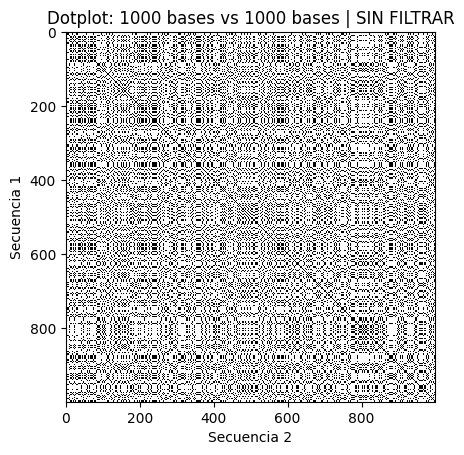

In [314]:
show_dotplot(dotplot)

#### Dotplot filtrado

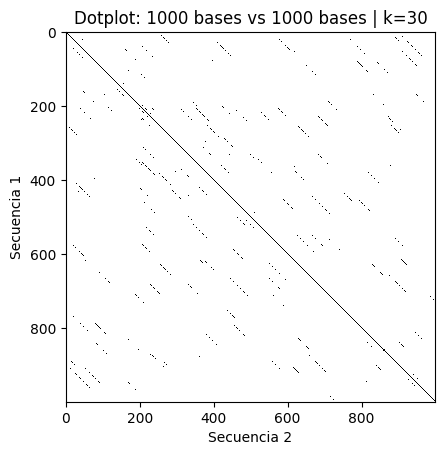

In [315]:
show_dotplot(f_dotplot, k)

#### Mejor alineamiento

In [304]:
print(align)

C0T1C2A3A4A5A6G7T8C9T10A11G12A13G14C15C16A17C18C19G20T21C22C23A24G25G26G27A28G29C30A31G32G33T34A35G36C37T38G39C40T41G42G43G44C45T46C47C48G49G50G51G52A53C54A55C56T57T58T59G60C61G62T63T64C65G66G67G68C69T70G71G72G73A74G75C76G77T78G79C80T81T82T83C84C85A86C87G88A89C90G91G92T93G94A95C96A97C98G99C100T101T102C103C104C105T106G107G108A109T110T111G112G113G114T115A116A117G118C119T120C121C122T123G124A125C126T127G128A129A130C131T132T133G134A135T136G137A138G139T140C141C142T143C144T145C146T147G148A149G150T151C152A153C154G155G156G157C158T159C160T161C162G163G164C165T166C167C168G169T170G171T172A173T174T175T176T177C178A179G180C181T182C183G184G185G186A187A188A189A190T191C192G193C194T195G196G197G198G199C200T201G202G203G204G205G206T207G208G209G210G211C212A213G214T215G216G217G218G219A220C221T222T223A224G225C226G227A228G229T230T231T232G233G234G235G236G237T238G239A240G241T242G243G244G245A246T247G248G249A250A251G252C253T254T255G256G257C258T259A260G261A262G263G264G265A266T267C268A269T270C271A272T273A274G275G276A2

### Comparación con Biopython

Función de alineamiento de biopython

In [249]:
from Bio import pairwise2

# Realizar el alineamiento
alignments = pairwise2.align.globalxx(seq1, seq2)

# Imprimir los alineamientos
for alignment in alignments:
    print(pairwise2.format_alignment(*alignment))

TA-CG
|| ||
TATCG
  Score=4

